In [32]:
#library pandas for data analysis
import pandas as pd
#library for imtemgeter
import operator as op
#library for zipfs function
import numpy as np
#library for zeta distribution
from scipy import special

from scipy.stats import zipf
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats=['png']
from sklearn import preprocessing
import math

In [33]:
#read csv into dataframes
d = pd.DataFrame.from_csv('/home/hud/2_s2 _sem2/dssrt_/datasets/KDD_Cup_1999/kddcup_data_tcp.csv',index_col=0)
pd.set_option('max_columns',150)


In [34]:
#assign columns to dataframes
d.columns = ['protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate','label']

In [35]:
#d

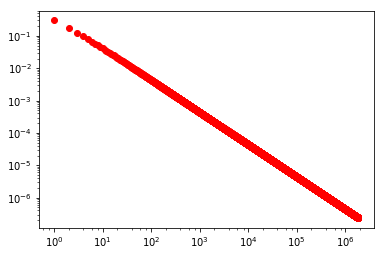

In [37]:
#type(d.dst_bytes)
features        = d.dst_bytes.apply(float)
sumed_fetures   = features.sum()
scaled_features = features.apply(lambda x: x/sumed_fetures)

length_features    = np.arange(1, len(features) + 1)
benf_list = [ ]
for numbers in length_features:
    benf_law = math.log10(1 + (1.0 / numbers))
    benf_list.append(benf_law)
benf_list = np.array(benf_list)


scaled_features
benf_list


plt.plot(length_features, benf_list, 'ro', label = "Benford's Law")
plt.xscale('log')
plt.yscale('log')